In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
import math
from matplotlib.patches import Ellipse

In [16]:
def plot_region(f, ax, direction):
    relu_x = np.linspace(0, 1, 1000)
    relu_y = f(relu_x)
    if direction == 'top':
        boundary = np.ones_like(relu_x)
    else:
        boundary = np.zeros_like(relu_x)
    relu_mask = (relu_y <= 1)
    ax.fill_between(relu_x[relu_mask], relu_y[relu_mask], boundary[relu_mask], color='lightgray')

# One cloud

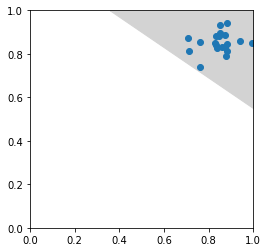

In [17]:
x = np.random.multivariate_normal([0.85, 0.85], np.diag([0.003, 0.003]), size=20).clip(0, 1)
    
def plot_one_cloud(ax):
    plot_region(lambda x: -0.7*x+1.25, ax, 'top')
    ax.scatter(x[:,0], x[:,1])
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    
fig, ax = plt.subplots(figsize=(4, 4))
plot_one_cloud(ax)

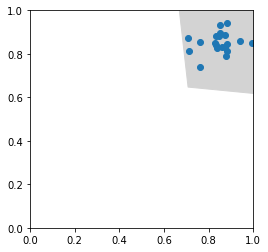

In [41]:
def plot_one_cloud_min(ax):
    plot_region(lambda x: np.maximum(-0.1*x+0.72, -9*x+7), ax, 'top')
    ax.scatter(x[:,0], x[:,1])
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    
fig, ax = plt.subplots(figsize=(4, 4))
plot_one_cloud_min(ax)

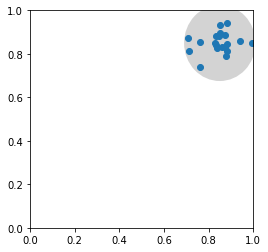

In [39]:
def plot_one_cloud_eliptic(ax):
    ellipse1 = Ellipse(xy=(0.85, 0.85), width=0.32, height=0.35)
    ellipse1.set_zorder(1)
    ellipse1.set_facecolor('lightgray')
    ax.add_patch(ellipse1)
    ax.scatter(x[:,0], x[:,1], zorder=2)
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    
fig, ax = plt.subplots(figsize=(4, 4))
plot_one_cloud_eliptic(ax)

# Two clouds

In [26]:
xa = np.random.multivariate_normal([0.18, 0.85], np.diag([0.003, 0.002]), size=20).clip(0, 1)
xb = np.random.multivariate_normal([0.85, 0.9], [[0.002, -0.001], [-0.001, 0.0025]], size=20).clip(0, 1)

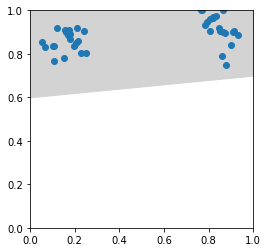

In [27]:
def plot_two_clouds(ax):
    plot_region(lambda x: 0.1*x+0.6, ax, 'top')
    ax.scatter(xa[:,0], xa[:,1], color='tab:blue')
    ax.scatter(xb[:,0], xb[:,1], color='tab:blue')
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    
fig, ax = plt.subplots(figsize=(4, 4))
plot_two_clouds(ax)

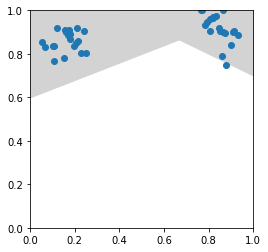

In [28]:
def plot_two_clouds_max(ax):
    plot_region(lambda x: 0.4*x+0.6, ax, 'top')
    plot_region(lambda x: -0.5*(x-1)+0.7, ax, 'top')
    ax.scatter(xa[:,0], xa[:,1], color='tab:blue')
    ax.scatter(xb[:,0], xb[:,1], color='tab:blue')
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    
fig, ax = plt.subplots(figsize=(4, 4))
plot_two_clouds_max(ax)

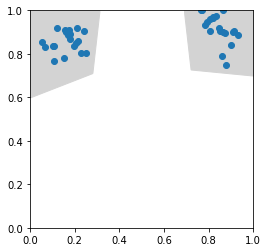

In [42]:
def plot_two_clouds_minmax(ax):
    plot_region(lambda x: np.maximum(-0.1*x+0.8, -9*x+7.2), ax, 'top')
    plot_region(lambda x: np.maximum(9*x-1.8, 0.4*x+0.6), ax, 'top')
    ax.scatter(xa[:,0], xa[:,1], color='tab:blue')
    ax.scatter(xb[:,0], xb[:,1], color='tab:blue')
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    
fig, ax = plt.subplots(figsize=(4, 4))
plot_two_clouds_minmax(ax)

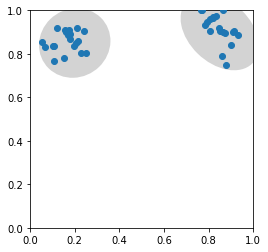

In [38]:
def plot_two_clouds_eliptic(ax):
    ellipse1 = Ellipse(xy=(0.2, 0.85), width=0.33, height=0.31, angle=45)
    ellipse1.set_zorder(1)
    ellipse1.set_facecolor('lightgray')
    ellipse2 = Ellipse(xy=(0.85, 0.9), width=0.28, height=0.41, angle=45)
    ellipse2.set_zorder(1)
    ellipse2.set_facecolor('lightgray')
    
    ax.add_patch(ellipse1)
    ax.add_patch(ellipse2)
    ax.scatter(xa[:,0], xa[:,1], color='tab:blue', zorder=3)
    ax.scatter(xb[:,0], xb[:,1], color='tab:blue', zorder=4)
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    
fig, ax = plt.subplots(figsize=(4, 4))
plot_two_clouds_eliptic(ax)

# Plot all

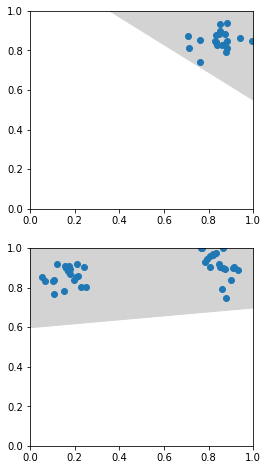

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(4, 8))
plot_one_cloud(ax[0])
plot_two_clouds(ax[1])

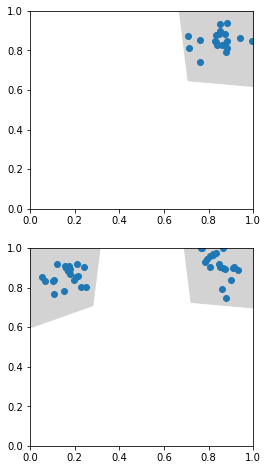

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(4, 8))
plot_one_cloud_min(ax[0])
plot_two_clouds_minmax(ax[1])

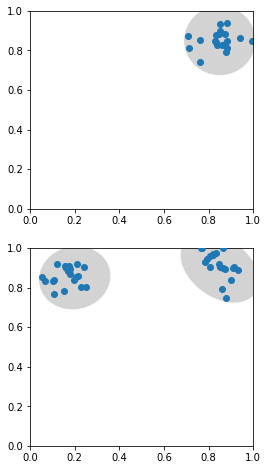

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(4, 8))
plot_one_cloud_eliptic(ax[0])
plot_two_clouds_eliptic(ax[1])